<a href="https://colab.research.google.com/github/gabrielcarcedo/Programa-Intensivo-en-Ciencia-de-Datos-De-los-Fundamentos-al-Deep-Learning/blob/main/Notebooks/Sesi%C3%B3n%202/%20Perceptron_frameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 3: Redes neuronales artificiales

El objetivo de esta libreta es construir una red neuronal basado en perceptrones usando las bibliotecas de [Keras](https://keras.io/), [Pytorch](https://pytorch.org/) y [Scikit-learn](https://scikit-learn.org/stable/).

Analizamos las gráficas de pérdida y de accuracy durante el entrenamiento, así como su evaluación final por cada red neuronal

### Conjuntos de entrenamiento, validación y prueba.

![Image in a markdown cell](https://raw.githubusercontent.com/blancavazquez/Taller_Yucatani6_2024/main/images/Train_test_split.png)[Imagen de elaboración propia]


#Base de datos

En esta libreta usaremos la base de datos de: Pima Indian diabetes.

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. Su objetivo es predecir si un paciente padece diabetes, basándose en ciertas mediciones diagnósticas incluidas en el conjunto de datos. Todos los pacientes en la base de datos son mujeres de al menos 21 años de ascendencia indígena pima.

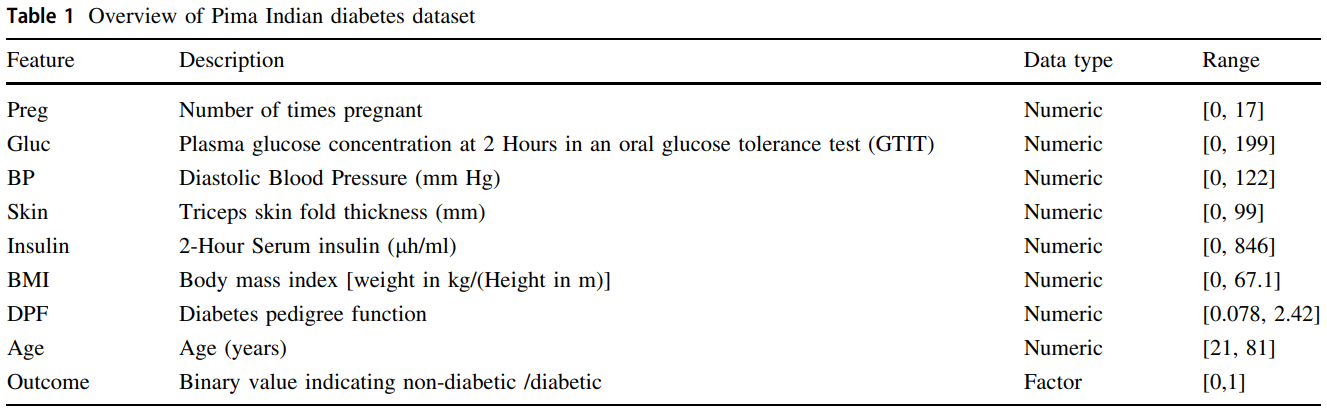

Imagen tomada de: Larabi-Marie-Sainte, S.; Aburahmah, L.; Almohaini, R.; Saba, T. Current Techniques for Diabetes Prediction: Review and Case Study. Appl. Sci. 2019, 9, 4604. https://doi.org/10.3390/app9214604

---------------------------

In [1]:
#Carga de bibliotecas
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import hinge_loss
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#Bibliotecas para Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Carga de datos

In [2]:
import kagglehub
import os
import pandas as pd

# Descargar los datos
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

dataset_path = "/kaggle/input/pima-indians-diabetes-database"
print(os.listdir(dataset_path))

Path to dataset files: /kaggle/input/pima-indians-diabetes-database
['diabetes.csv']


In [3]:
df = pd.read_csv(os.path.join(dataset_path, "diabetes.csv"))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print("¿Valores ausentes?")
print(df.isnull().sum())
#df_mean_filled = df.fillna(df.mean()) # En caso de faltantes, podemos llenar con el valor de la media

¿Valores ausentes?
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
#Se define las variables de entrada (X) y la variable de salida (Y)
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]
print("X: ", X.shape, "y:",y.shape)

X:  (768, 8) y: (768,)


In [7]:
print("Normalizar datos")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
print("X_scaled:",X_scaled.shape)

Normalizar datos
X_scaled: (768, 8)


In [8]:
print("Dividir los datos en los conjuntos de entrenamiento, validación y prueba")
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled,y,test_size = 0.2, random_state = 42)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain,ytrain,test_size = 0.2, random_state = 42)

print("Tamaño del conjunto de entrenamiento Xtrain:", Xtrain.shape, "ytrain:", ytrain.shape)
print("Tamaño del conjunto de validación Xval:", Xval.shape, "yval:", yval.shape)
print("Tamaño del conjunto de prueba Xtest:", Xtest.shape, "ytest:", ytest.shape)

Dividir los datos en los conjuntos de entrenamiento, validación y prueba
Tamaño del conjunto de entrenamiento Xtrain: (491, 8) ytrain: (491,)
Tamaño del conjunto de validación Xval: (123, 8) yval: (123,)
Tamaño del conjunto de prueba Xtest: (154, 8) ytest: (154,)


# Perceptrón multicapa usando Keras

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import keras

#Definimos hiperparámetros
epocas = 10  # Número de épocas para el entrenamiento
batch_size = 16 #Tamaño del batch / lote de datos
input_dim = 8 #Número de variables de entrada
learning_rate = 0.01 #tasa de aprendizaje
output_size = 1  # Tamaño de la salida (clasificación binaria)

## Creación del modelo
model = Sequential()
model.add(Dense(12, input_dim=input_dim, activation='relu')) #1era capa
model.add(Dense(8, activation='relu')) #2da capa
model.add(Dense(output_size, activation='sigmoid' )) ##3ra capa (salida)

# Compile the model
opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',   # dado que la salida es binaria
             optimizer=opt,
             metrics=['accuracy'])

#Paro temprano
early_stopping = EarlyStopping(
        monitor='val_loss',  # Métrica a monitorear durante el entrenamiento (e.g., validation loss)
        patience=3,         # Número de épocas sin mejoría después de las cuales se detendrá el entrenamiento
        mode='min',          # 'min' para que las métricas se minimicen (como la pérdida), 'max' para que las métricas se maximicen (como la precisión)
        restore_best_weights=True #Restaura los pesos del modelo con el mejor rendimiento
        )
#Función para guardar el modelo
checkpoint = ModelCheckpoint('pima-weights.best.h5',  #Guardamos el mejor modelo
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')

print('Starting training...')
history = model.fit(Xtrain,
                    ytrain,
                    validation_data=(Xval, yval),
                    epochs=epocas,
                    batch_size=batch_size,
                    callbacks=[early_stopping, checkpoint],
                    verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training...
Epoch 1/10
18/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 0.6423 

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6299 - loss: 0.6051 - val_accuracy: 0.7967 - val_loss: 0.5292
Epoch 2/10
20/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.5184 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7124 - loss: 0.5075 - val_accuracy: 0.7886 - val_loss: 0.4793
Epoch 3/10
22/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7493 - loss: 0.5018  

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7517 - loss: 0.4911 - val_accuracy: 0.7886 - val_loss: 0.4784
Epoch 4/10
21/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7869 - loss: 0.4375 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7808 - loss: 0.4378 - val_accuracy: 0.7642 - val_loss: 0.4740
Epoch 5/10
26/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7561 - loss: 0.4514

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7584 - loss: 0.4500 - val_accuracy: 0.7561 - val_loss: 0.4837
Epoch 6/10
15/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7848 - loss: 0.3809   

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7743 - loss: 0.4071 - val_accuracy: 0.7724 - val_loss: 0.4893
Epoch 7/10
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8028 - loss: 0.4147

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8019 - loss: 0.4158 - val_accuracy: 0.7642 - val_loss: 0.5150


Visualizando las gráficas del rendimiento del modelo


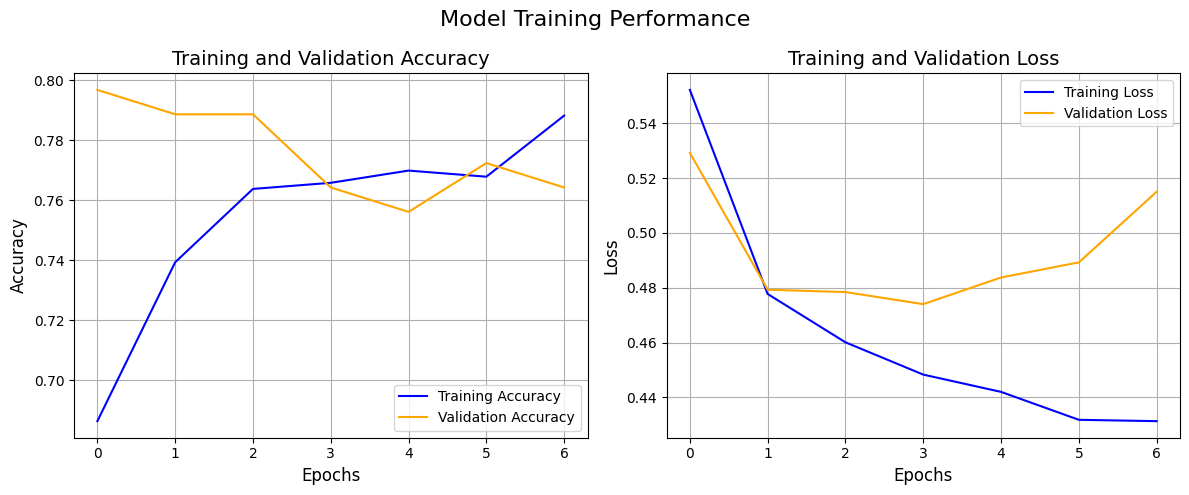

In [10]:
print("Visualizando las gráficas del rendimiento del modelo")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
print("Evaluación final en el conjunto de prueba")
scores = model.evaluate(Xtest, ytest, verbose=0)
print("Accuracy: ", np.round(scores[1]*100,2))

Evaluación final en el conjunto de prueba
Accuracy:  72.73


# Perceptrón multicapa usando Pytorch

In [12]:
#Carga de las bibliotecas
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

In [13]:
print("Tipo de dato", type(Xtrain))

Tipo de dato <class 'pandas.core.frame.DataFrame'>


In [14]:
def fromPandas_to_tensor(dfx, dfy):
  "Función para convertir de DataFrame(pandas) hacia tensores (torch)"
  x = torch.from_numpy(dfx.to_numpy(dtype=np.float32))
  y = torch.from_numpy(dfy.to_numpy(dtype=np.float32)).reshape(-1, 1)
  return x, y

Xtrain_tensor, ytrain_tensor = fromPandas_to_tensor(Xtrain, ytrain)
Xval_tensor, yval_tensor = fromPandas_to_tensor(Xval, yval)
Xtest_tensor, ytest_tensor = fromPandas_to_tensor(Xtest, ytest)

print("Tamaño del conjunto de entrenamiento Xtrain:", Xtrain_tensor.shape, "ytrain:", ytrain_tensor.shape)
print("Tamaño del conjunto de validación Xval:", Xval_tensor.shape, "yval:", yval_tensor.shape)
print("Tamaño del conjunto de prueba Xtest:", Xtest_tensor.shape, "ytest:", ytest_tensor.shape)

Tamaño del conjunto de entrenamiento Xtrain: torch.Size([491, 8]) ytrain: torch.Size([491, 1])
Tamaño del conjunto de validación Xval: torch.Size([123, 8]) yval: torch.Size([123, 1])
Tamaño del conjunto de prueba Xtest: torch.Size([154, 8]) ytest: torch.Size([154, 1])


In [15]:
#Convertir hacia datasets
train_dataset = TensorDataset(Xtrain_tensor, ytrain_tensor)
val_dataset = TensorDataset(Xval_tensor, yval_tensor)
test_dataset = TensorDataset(Xtest_tensor, ytest_tensor)

#Convertir hacia cargadores de datos
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [16]:
print("Definimos nuestro modelo")
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.2):
        super(MLP, self).__init__()
        layers = []
        # Capa de entrada
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))

        # Capas ocultas
        for i in range(len(hidden_sizes)-1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))

        # Capa de salida
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        layers.append(nn.Sigmoid())  # Para clasificación binaria

        # Combinamos todas las capas para construir un modelo secuencial
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

Definimos nuestro modelo


In [17]:
# Definimos los hiperparámetros
input_size = 8  # Número de variables de entrada
hidden_sizes = [64, 32]  # Número de neurones por capa oculta
output_size = 1  # Tamaño de la salida (clasificación binaria)
epocas = 10  # Número de épocas para el entrenamiento
learning_rate = 0.01 #tasa de aprendizaje
batch_size = 16 #Tamaño del batch / lote de datos

# Instanciamos el modelo
model = MLP(input_size, hidden_sizes, output_size)
print(model)

# Definimos la función de pérdida y el optimizador
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

MLP(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [18]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    # Listas para guardar resultados
    train_losses, val_losses = [], []
    train_acc, val_acc = [], []

    # Training
    for epoch in range(num_epochs):
        model.train()  # Configurar el modelo en modo: entrenamiento
        running_loss = 0.0
        running_corrects = 0
        running_total = 0
        val_running_total = 0
        val_running_corrects = 0

        for train_data, train_labels in train_loader:
            optimizer.zero_grad() #inicializamos en cero

            # Propagación hacia adelante (forward pass)
            predictions = model(train_data)
            loss = criterion(predictions, train_labels)

            # Propagación hacia atrás (backward pass)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * train_data.size(0)
            predicted = (predictions > 0.5).float() #torch.max(predictions.data, 1)
            running_total += train_labels.size(0)
            running_corrects += (predicted == train_labels).sum().item()

        # Calcular la pérdida y el accuracy del entrenamiento
        epoch_loss = running_loss / len(train_loader.dataset)
        train_accuracy = running_corrects / running_total
        train_losses.append(epoch_loss)
        train_acc.append(train_accuracy)

        # Imprimir resultados por época
        if (epoch+1) % 5 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

        #print('validating...')
        valid_loss = 0.0
        model.eval()     # Validación del modelo
        for val_data, val_labels in val_loader:
            if torch.cuda.is_available():
                val_data, val_labels = val_data.cuda(), val_labels.cuda()
            val_predictions = model(val_data)
            val_loss = criterion(val_predictions,val_labels)

            valid_loss += val_loss.item() * val_data.size(0)
            val_predicted = (val_predictions > 0.5).float()
            val_running_total += val_labels.size(0)
            val_running_corrects += (val_predicted == val_labels).sum().item()
        # Calcular la pérdida y el accuracy en validación
        val_epoch_loss = valid_loss / len(val_loader.dataset)
        val_accuracy = val_running_corrects / val_running_total
        val_losses.append(val_epoch_loss)
        val_acc.append(val_accuracy)

    return train_losses, train_acc, val_losses, val_acc

# Train the model
train_losses, train_acc, val_losses, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=epocas)


Epoch 5/10, Loss: 0.4526
Epoch 10/10, Loss: 0.4163


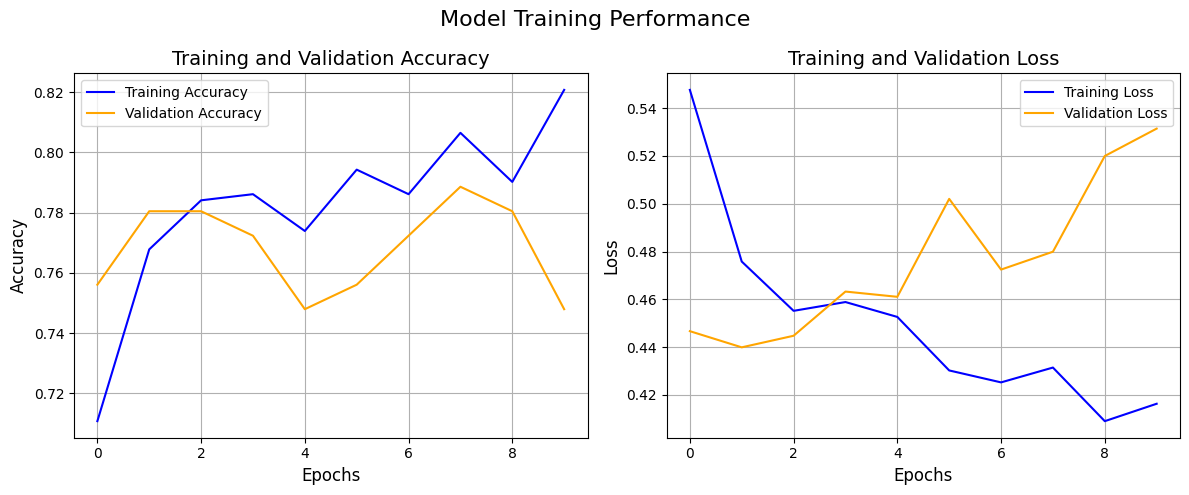

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
#Evaluar el modelo en el conjunto de datos de prueba
testing_loss = 0.0
test_running_corrects = 0
running_total = 0
test_running_total = 0
test_running_corrects = 0

model.eval()     # Validación del modelo
for test_data, test_labels in test_loader:
  if torch.cuda.is_available():
    test_data, test_labels = test_data.cuda(), test_labels.cuda()
  test_predictions = model(test_data)
  test_loss = criterion(test_predictions,test_labels)

  testing_loss += test_loss.item() * test_data.size(0)
  test_predicted = (test_predictions > 0.5).float()
  test_running_total += test_labels.size(0)
  test_running_corrects += (test_predicted == test_labels).sum().item()

test_epoch_loss = testing_loss / len(test_loader.dataset)
test_accuracy = (test_running_corrects / test_running_total) * 100

print("Rendimiento sobre el conjunto de prueba")
print("Loss:", test_epoch_loss)
print("Accuracy:", test_accuracy)

Rendimiento sobre el conjunto de prueba
Loss: 0.6184260210433563
Accuracy: 69.48051948051948


## 1. Perceptrón multivariable con Scikit-learn

In [21]:
print("Instaciamos el perceptrón multivariable")
modelo = Perceptron(max_iter=1000, eta0=0.1)

Instaciamos el perceptrón multivariable


In [22]:
print("Entrenamos el modelo")
modelo.fit(Xtrain, ytrain)

Entrenamos el modelo


Perceptron(eta0=0.1)

In [23]:
print("Calculando accuracy")
print("Training: %f" % modelo.score(Xtrain, ytrain))
print("Validation: %f" % modelo.score(Xval, yval))
print("Testing: %f" % modelo.score(Xtest, ytest))

Calculando accuracy
Training: 0.759674
Validation: 0.837398
Testing: 0.753247


Visualizamos la matriz de confusión


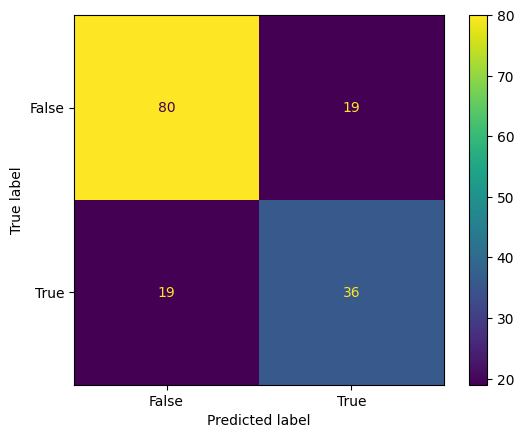

In [24]:
print("Visualizamos la matriz de confusión")
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(ytest, modelo.predict(Xtest))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()

## Perceptrón multicapa con Scikit-learn

In [25]:
from sklearn.neural_network import MLPClassifier
modelo_multicapa = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(100,)).fit(Xtrain, ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
print("Calculando accuracy")
print("Training: %f" % modelo_multicapa.score(Xtrain, ytrain))
print("Validation: %f" % modelo_multicapa.score(Xval, yval))
print("Testing: %f" % modelo_multicapa.score(Xtest, ytest))

Calculando accuracy
Training: 0.841141
Validation: 0.756098
Testing: 0.701299


Visualizamos la matriz de confusión


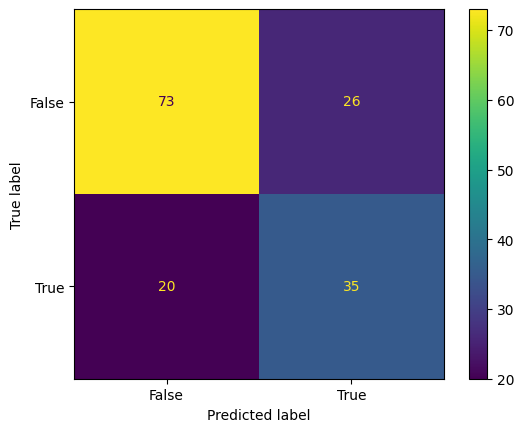

In [27]:
print("Visualizamos la matriz de confusión")
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(ytest, modelo_multicapa.predict(Xtest))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()